In [1]:
# utilizziamo il modello di regressione logistica disponibile nella
# libreria Sci-Kit Learn per implementare velocemente un modello
# di regressione logistica capace di lavorare su più classi

# Import librerie necessarie

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

In [2]:
# caricamento dataset sfruttando il dataset "digits" di SciKit-Learn

digits_df = datasets.load_digits()
print('Struttura del dataset: ', dir(digits_df), '\n')
print('Dimensione dataset: ', digits_df.data.shape, '\n')
print('Il dataset contiene la rappresentazione in pixel delle immagini, \n', digits_df.data)

Struttura del dataset:  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names'] 

Dimensione dataset:  (1797, 64) 

Il dataset contiene la rappresentazione in pixel delle immagini, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


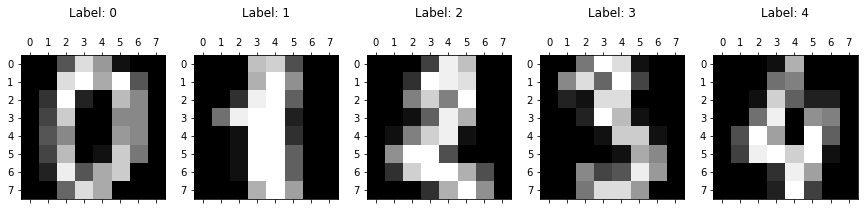

In [3]:
# data visualization

# usiamo subplot per creare più grafici in un'unica
# immagine e rappresentiamo i numeri da 0 a 4

rows = 1
columns = 5
fig, ax = plt.subplots(rows, columns, figsize=(15, 6))

plt.gray()
for i in range(columns):
    ax[i].matshow(digits_df.images[i])
    ax[i].set_title('Label: %s\n' % digits_df.target_names[i])

plt.show()

In [4]:
# creazione del dataset di esempi X e del vettore di etichette y

X = digits_df.data / 16
y = digits_df.target

In [5]:
# suddivisione in dataset di addestramento e di test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

print('Dimensioni dei dataset:')
print('X_train = ', X_train.shape)
print('X_test  = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_train = ', y_test.shape)

Dimensioni dei dataset:
X_train =  (1437, 64)
X_test  =  (360, 64)
y_train =  (1437,)
y_train =  (360,)


In [6]:
# modello di regressione logistica

lm = linear_model.LogisticRegression(max_iter=15000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [7]:
# testing del modello

id = 24

print('Valore predetto :', lm.predict([X_test[id]]))

print('Il valore dal dataset di test è %s' % (y_test[id]))


Valore predetto : [0]
Il valore dal dataset di test è 0


In [8]:
# valutazione del modello

lm.score(X_test, y_test)

0.9805555555555555

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

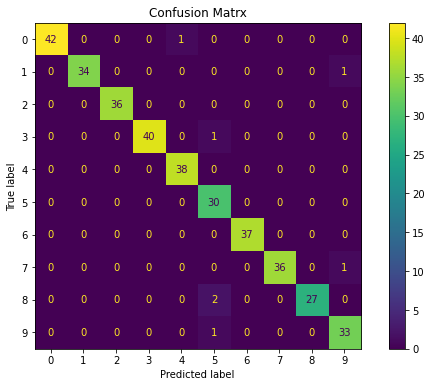

In [9]:
# matrice di confusione

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(
    lm, X_test, y_test, display_labels=digits_df.target_names, ax=ax)
disp.confusion_matrix